In [1]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Delete the duplicate rows
df = df.drop_duplicates()

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [5]:
# !!! Takes around half a hour to run
vectorizers_opt = ['count', 'hashing', 'tfidf']
models_opt      = ['lr','knn', 'rf', 'xgboost', 'svm', 'bayes']

vectorizer  = 'foo' # Dummy value for vectorizer to be overwritten later
model       = 'foo' # Dummy value for model to be overwritten later
count       = 0

performance_results = []

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
for i in vectorizers_opt:
    if i == 'count':
        #(1) CountVectorizer
        vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

    elif i == 'hashing':
        #(2) #HashingVectorizer
        vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

    elif i == 'tfidf':
        #(3)TfidfVectorizer
        vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

    x = vectorizer.fit_transform(df['Text'])
    y = df['Sentiment']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

    for j in models_opt: 
        if j == 'lr': 
            #-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
            #(1)LR
            model = LogisticRegression(max_iter=1000, random_state=0)
            param_grid = {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
            }

        elif j == 'knn': 
            #(2)KNN
            model=KNeighborsClassifier()
            param_grid = {
                 'n_neighbors': [3, 5, 7, 9],
                 'weights': ['uniform', 'distance']
            }

        elif j == 'rf':
            #(3)RF
            model = RandomForestClassifier(random_state=0)
            param_grid = {
                 'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]
            }

        elif j == 'xgboost':
            #(4)XGBoost
            model =  XGBClassifier()
            param_grid = {
                 'learning_rate': [0.01, 0.1, 0.2],
                 'n_estimators': [100, 200, 300],
                 'max_depth': [3, 4, 5]
            }

        elif j == 'svm': 
            #(5)SVM
            model= SVC(probability=True)

            #this is an example to use the grid search to find the best parameter for SVM model
            #param_grid` specifies the hyperparameter grid to search over： kernel types ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
            param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

        elif j == 'bayes':
            #(6)Naïve Bayes models
            model=BernoulliNB()
            param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

        #`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        #`fit` method fits the model to the training data, systematically trying out all parameter combinations.
        grid_search.fit(x_train, y_train)

        #`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
        best_params = grid_search.best_params_
        print(best_params)
        best_score = grid_search.best_score_

        #The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
        model = grid_search.best_estimator_

        #-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

        #cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

        #calculate accuracy
        print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
        performance_results.append({ 'model': j , 'vectorizer': i, 'accuracy_score': str(accuracy_score(y_test,model.predict(x_test))), 'params': best_params})

{'C': 1}
The accuracy of the model is: 0.937799043062201
{'n_neighbors': 7, 'weights': 'distance'}
The accuracy of the model is: 0.9593301435406698
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
The accuracy of the model is: 0.9688995215311005
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the model is: 0.9593301435406698
{'C': 10, 'kernel': 'rbf'}
The accuracy of the model is: 0.9593301435406698
{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9497607655502392
{'C': 10}
The accuracy of the model is: 0.9521531100478469
{'n_neighbors': 9, 'weights': 'uniform'}
The accuracy of the model is: 0.9545454545454546
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of the model is: 0.9712918660287081
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9736842105263158
{'C': 10, 'kernel': 'rbf'}
The accuracy of the mode

In [8]:
# Export the performance results into a csv via pandas
performance_df = pd.DataFrame(performance_results)
performance_df.to_csv('performance_results.csv', sep=';')

In [12]:
#Show results in descending performance
performance_df.sort_values(by=['accuracy_score'], ascending=False)

,model,vectorizer,accuracy_score,params
9,xgboost,hashing,0.9736842105263158,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
8,rf,hashing,0.9712918660287081,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
10,svm,hashing,0.9712918660287081,"{'C': 10, 'kernel': 'rbf'}"
14,rf,tfidf,0.9688995215311005,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_..."
2,rf,count,0.9688995215311005,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
15,xgboost,tfidf,0.9641148325358851,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,xgboost,count,0.9593301435406698,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
4,svm,count,0.9593301435406698,"{'C': 10, 'kernel': 'rbf'}"
1,knn,count,0.9593301435406698,"{'n_neighbors': 7, 'weights': 'distance'}"
12,lr,tfidf,0.9569377990430622,{'C': 0.1}


The accuracy of the model is: 0.9736842105263158


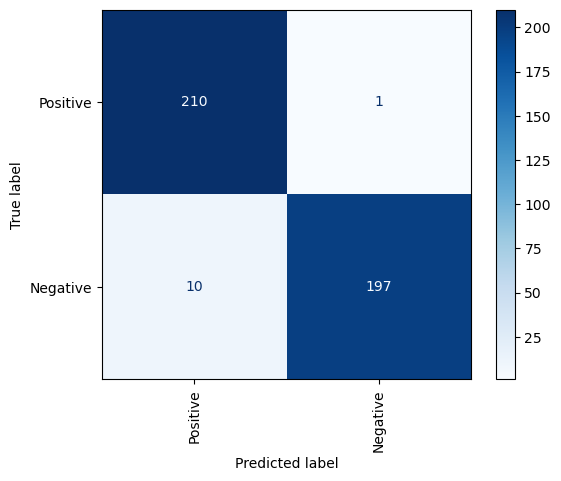

In [6]:
#Here we take the best performing and runs some tests on it. 
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)



model =  XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
model.fit(x_train, y_train)

print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')